In [23]:
!pip install dtreeviz
!pip install pyreadstat
!pip install visualkeras
!pip install keras_tuner
!pip install gdown
!pip install matplotlib==3.1.1
!pip install $(spacy info es_core_news_sm --url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-08 21:18:45.742466: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  

In [24]:
import string
import pandas as pd
import numpy as np
import csv
import statistics

#Visualización
from seaborn import color_palette
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle
import pickle

import pyreadstat

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# 
import spacy
from collections import Counter

#USAR PARA VER LAS DESCRIPCIONES COMPLETAS
pd.set_option('display.max_colwidth', None)

Importamos dataset varios

In [25]:
url = 'https://drive.google.com/file/d/1pjD0WMUmUzX871xIXfkqqAEEi17C87rd/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

ds_propiedades = pd.read_csv(path)

In [ ]:
url = 'https://drive.google.com/file/d/1kHwjnroz-B9e56X8h-FCErXwyJocjnyf/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

ds_train = pd.read_csv(path)
ds_train.loc[:, ~ds_train.columns.str.contains('^Unnamed')]


In [ ]:
url = 'https://drive.google.com/file/d/1BtGrZB4SDa-Ta083wigArlxC81TAbYta/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

ds_test = pd.read_csv(path)
ds_test.loc[:, ~ds_test.columns.str.contains('^Unnamed')]

In [28]:
url = 'https://drive.google.com/file/d/1xjZFkcBtrJkfAdtzyBGl_wtAIiLzv-RL/view?usp=sharing&confirm=t'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]+"&confirm=t"

ds_descripciones = pd.read_csv(path)
ds_descripciones = ds_descripciones[ds_descripciones['id'].isin(ds_propiedades['id'])]

## Analisis del lenguaje natural

Unimos los dos datasets: el de descripciones y el preprocesado en el tp1. Para esto usamos el atributo 'id' de ambos.


In [29]:
ds_pln_train = ds_train.merge(ds_descripciones, left_on='id', right_on='id')
ds_pln_test = ds_test.merge(ds_descripciones, left_on='id', right_on='id')

Normalizamos las expresiones regulares de la columna de descripciones de nuestro dataset

In [30]:
def normalizar(descripcion):
  descripcion = descripcion.lower()
  descripcion = descripcion.replace('á', 'a')
  descripcion = descripcion.replace('é', 'e')
  descripcion = descripcion.replace('í', 'i')
  descripcion = descripcion.replace('ó', 'o')
  descripcion = descripcion.replace('ú', 'u')
  descripcion = descripcion.replace('ü', 'u')
  descripcion = descripcion.replace('Á', 'a')
  descripcion = descripcion.replace('É', 'e')
  descripcion = descripcion.replace('Í', 'i')
  descripcion = descripcion.replace('Ó', 'o')
  descripcion = descripcion.replace('Ú', 'u')
  descripcion = descripcion.replace('ñ', 'ni')
  descripcion = descripcion.replace('Ñ', 'Ni')
  descripcion = descripcion.replace('m²','m2')
  descripcion = descripcion.replace('M²', 'M2')
  descripcion = descripcion.replace('&', ' ')
  descripcion = descripcion.replace(' y ', ' ')
  descripcion = descripcion.replace(' el ', ' ')
  descripcion = descripcion.replace(' los ', ' ')
  descripcion = descripcion.replace(' la ', ' ')
  descripcion = descripcion.replace(' las ', ' ')
  descripcion = descripcion.replace(' a ', ' ')
  descripcion = descripcion.replace(' o ', ' ')
  descripcion = descripcion.replace('\n', ' ')
  descripcion = descripcion.replace('para', ' ')
  descripcion = descripcion.replace('tiene', ' ')
  descripcion = descripcion.replace('como', ' ')
  descripcion = descripcion.replace('esta', ' ')
  descripcion = descripcion.replace('este', ' ')
  descripcion = descripcion.replace('hasta', ' ')
  descripcion = descripcion.replace('aire acondicionado', 'aire-acondicionado')
  descripcion = descripcion.replace('podes', '')
  descripcion = descripcion.replace('simula', '')
  descripcion = descripcion.replace('gran vista', 'gran-vista')
  descripcion = descripcion.replace('parte', '')
  descripcion = descripcion.replace('encuentra', '')
  descripcion = descripcion.replace('presente', '')
  descripcion = descripcion.replace('todas', '')
  descripcion = descripcion.replace('todos', '')
  descripcion = descripcion.replace('sobre', '')
  descripcion = descripcion.replace('titulo', '')
  descripcion = descripcion.replace('piso', '')
  descripcion = descripcion.replace('tipo', '')
  descripcion = descripcion.replace('todo', '')
  descripcion = descripcion.replace('total', '')
  descripcion = descripcion.replace('aproximado', '')
  descripcion = descripcion.replace(' cion ', '')
  descripcion = descripcion.replace('puede', '')
  descripcion = descripcion.replace('Gimnasio', 'gimnasio')
  descripcion = descripcion.replace('a estrenar', 'a_estrenar')
  descripcion = descripcion.replace('av', 'avenida')
  descripcion = descripcion.replace('av.', 'avenida')

  return descripcion



def borrar_signos_puntuacion_caracteres_especiales(row):
  descripcion = row['property_description']
  descripcion = normalizar(descripcion)

  return descripcion.translate(str.maketrans('', '', string.punctuation))

Aplicamos las funciones de limpieza y usamos una regexp para quedarnos nada mas con numeros, letras y simbolos de puntuacion.

In [31]:
ds_pln_train.property_description = ds_pln_train.apply(lambda row: borrar_signos_puntuacion_caracteres_especiales(row), axis=1)
ds_pln_test.property_description = ds_pln_test.apply(lambda row: borrar_signos_puntuacion_caracteres_especiales(row), axis=1)

ds_pln_train['property_description'] = ds_pln_train['property_description'].replace(r'[^A-Za-z0-9,.!]', ' ', regex=True)
ds_pln_test['property_description'] = ds_pln_test['property_description'].replace(r'[^a-zA-Z0-9,.!]', ' ', regex=True)


Vemos la frecuencia de las palabras más usadas en las descripciones de las propiedades y las graficamos.

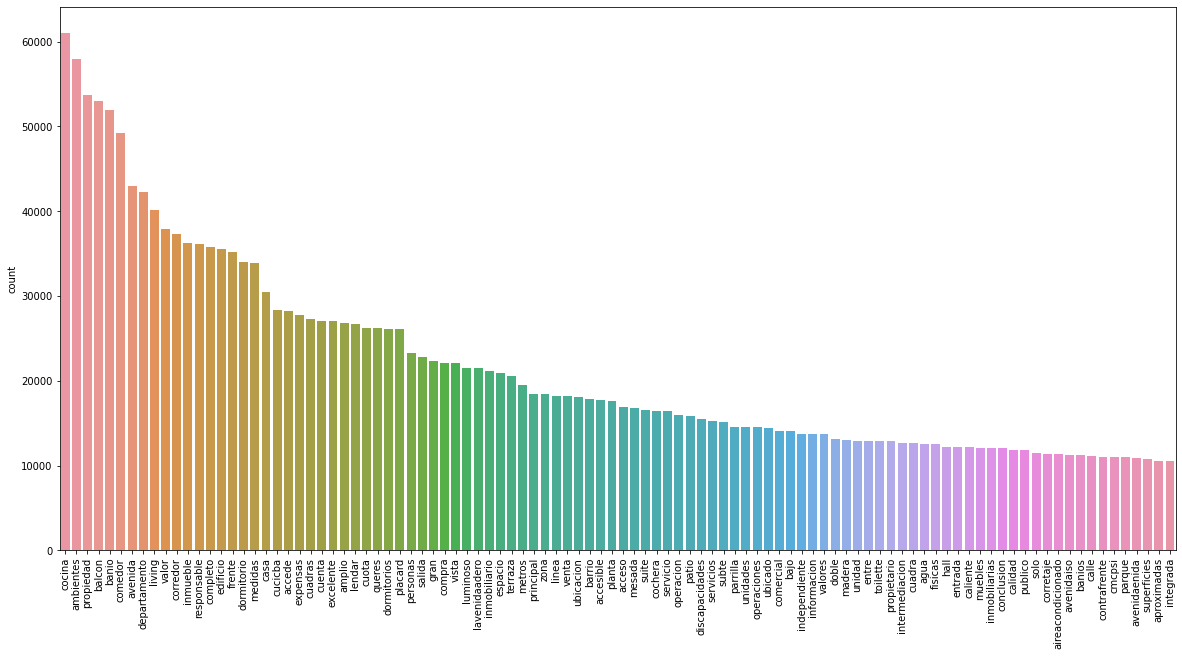

In [32]:
word_count = {}
ds_pln_train.reset_index(drop=True, inplace=True)

for i in range(len(ds_pln_train['property_description'])):
    if type(ds_pln_train['property_description'][i]) == str:
        for word in ds_pln_train['property_description'][i].split():
            if len(word) < 4:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# save dictionary in a dataframe

word_count_aux = word_count.copy()

for key, value in word_count_aux.items():
    if value <= 300:
        del word_count[key]

df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])
df_word_count.sort_values(by=['count'], ascending=False, inplace=True)
df_word_count



# barplot of the 20 most common words
plt.figure(figsize=(20,10))
sns.barplot(x=df_word_count.index[:100], y=df_word_count['count'][:100])
plt.xticks(rotation=90)
plt.show()

Generamos las nuevas columnas usando palabras claves en el dominio del problema.

In [33]:
def crear_columnas_pnl(row, col):
  if col in row['property_description']:
    return 1
  
  return 0

columnas_pnl = ["cochera", "aire-acondicionado", "gran-vista", "parque", "balcon", "amplio", "luminoso", "terraza", "a_estrenar", "gimnasio"]
for col in columnas_pnl:
  ds_pln_train[col] = ds_pln_train.apply(lambda row: crear_columnas_pnl(row,col), axis=1)
  ds_pln_test[col] = ds_pln_test.apply(lambda row: crear_columnas_pnl(row,col), axis=1)


ds_pln_train.drop('property_description', axis =1, inplace = True)
ds_pln_test.drop('property_description', axis =1, inplace = True)
ds_pln_train.drop('Unnamed: 0', axis =1, inplace = True)
ds_pln_test.drop('Unnamed: 0', axis =1, inplace = True)

Exportamos los Datasets a sus correspondientes CSVs

In [34]:
ds_pln_train.to_csv('ds_pln_train')
ds_pln_test.to_csv('ds_pln_test')

Usamos una tecnica basada en frecuencia y palabras que indican “carga de valor” y creamos sus columnas correspondientes al estilo "one-hot encoding", usamos una expresion regular para realizar una limpieza de las descripciones y normlizamos el texto para hacer mas facil su analisis. 